In [1]:
from plotstock import plotstock
import pandas as pd
import os
from PIL import Image
import torchvision.transforms as transforms
# from torchvision.transforms.functional import pil_to_tensor
from torchvision.transforms.functional import to_pil_image


train_str_data_dir = '../train_data/mock.csv'
stock_data_dir = '../stock_data/'
images_folder = "../stock_image"

WEEKS_IN_YEAR = 52

/home/wilson3124/miniconda3/envs/stage/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/wilson3124/miniconda3/envs/stage/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
train_data_dir = pd.read_csv(train_str_data_dir)

In [3]:
stock = train_data_dir.iloc[0, 0]
start_date_str = train_data_dir.iloc[0, 1]
start_date = pd.Timestamp(start_date_str)
stage = train_data_dir.iloc[0, 2]

In [4]:
pickle_dir = os.path.join(stock_data_dir, f"{stock}.pkl")
stock_data = pd.read_pickle(pickle_dir)

In [5]:
start_date_index = stock_data.index.get_loc(start_date)
end_date_index = start_date_index + WEEKS_IN_YEAR * 2
desired_data = stock_data.iloc[start_date_index:end_date_index]

/home/wilson3124/Documents/Personal Projects/stage-analysis/toolbox/plotstock.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.axhline(df.fyh[-1], color=fyh_color, linewidth=line_width)


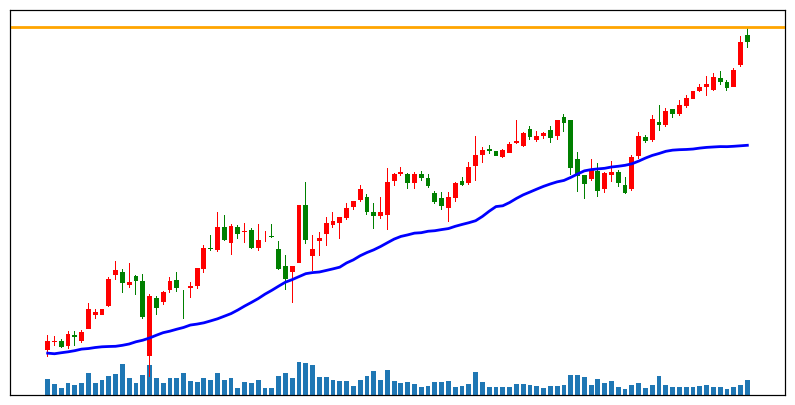

In [6]:
plotstock(desired_data, "cache")

transform = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

stock_img = Image.open(os.path.join(images_folder, f"cache.png"))
# stock_volume_img = Image.open(os.path.join(images_folder, f"cache_volume.png"))

stock_img = stock_img.convert('RGB')  
# stock_volume_img = stock_volume_img.convert('RGB')  

convert_tensor = transforms.ToTensor()

stock_img_tensor = convert_tensor(stock_img)
# stock_volume_img_tensor = convert_tensor(stock_volume_img)

normalized_stock = transform(stock_img_tensor)
# normalized_stock_volume = transform(stock_volume_img_tensor)

normalized_stock_img = to_pil_image(normalized_stock)
# normalized_stock_volume_img = to_pil_image(normalized_stock_volume)

In [7]:
normalized_stock_img.show()

In [8]:
# normalized_stock_volume_img.show()